In [22]:
import pandas as pd

In [23]:
# Load the dataset from a CSV file
df = pd.read_csv('boston_housing.csv')

In [24]:
# Display the first few rows of the dataset
print(df.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [25]:
from sklearn.preprocessing import StandardScaler
# Split the data into input and output variables
X = df.drop('MEDV', axis=1)
y = df['MEDV']

In [26]:
# Scale the input features
scaler = StandardScaler()
scaler.fit_transform(X)
print(X[:5])

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33  


In [27]:
from sklearn.model_selection import train_test_split
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
#Print the shapes of the training and testing sets
print('Training set shape:', X_train.shape, y_train.shape)
print('Testing set shape:', X_test.shape, y_test.shape)

Training set shape: (354, 13) (354,)
Testing set shape: (152, 13) (152,)


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
# Define the model architecture
model =Sequential()
model.add(Dense(64,input_dim=13,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dense(1))

C:\Users\Sahil\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
# Display the model summary
print(model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

None


In [31]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

In [32]:
from keras.callbacks import EarlyStopping
# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32,callbacks=[early_stopping])

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 147ms/step - loss: 5027.0952 - mean_absolute_error: 60.2904 - val_loss: 98.5558 - val_mean_absolute_error: 6.9693
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 879.1959 - mean_absolute_error: 22.8825 - val_loss: 518.4479 - val_mean_absolute_error: 20.8606
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 859.2172 - mean_absolute_error: 23.7202 - val_loss: 95.0942 - val_mean_absolute_error: 6.5012
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 578.1545 - mean_absolute_error: 19.7316 - val_loss: 106.2631 - val_mean_absolute_error: 8.0758
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 500.1544 - mean_absolute_error: 17.9838 - val_loss: 90.5020 - val_mean_absolute_error: 6.7073
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 352.6249 - mean_absolute_error: 14.9503 - val_loss: 93.6940 - val_mean_absolute_error: 6.6171
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 496.9810 - mean_absolute_

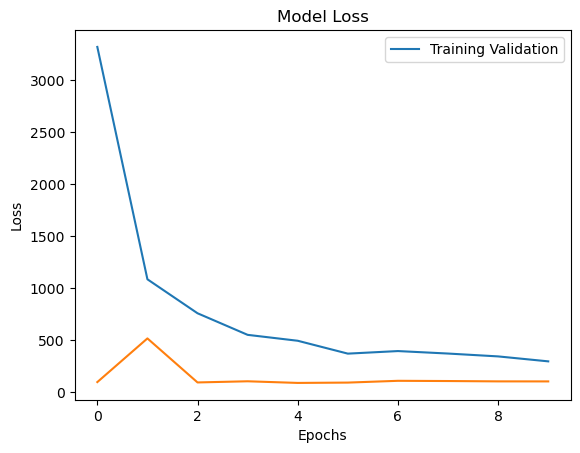

In [33]:
# Plot the training and validation loss over epochs import
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Validation'])
plt.show()

In [34]:
# Evaluate the model on the testing set loss,
mae = model.evaluate (X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 64.0345 - mean_absolute_error: 5.7413


In [35]:
# Print the mean absolute error
print('Mean Absolute Error:', mae)

Mean Absolute Error: [72.18216705322266, 6.099465847015381]
